In [1]:
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import networkx as nx
import ast

C:\Users\I6240624\AppData\Local\Temp\ipykernel_5864\3537453158.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#read in Instagram data
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua_en_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_ins = csv.reader(f, delimiter=',')
    rows_ins_en = list(reader_ins)
    #read in Instagram data
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua_nl_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_ins = csv.reader(f, delimiter=',')
    rows_ins_nl = list(reader_ins)

In [3]:
 #read in TikTok data ENGLISH
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_en_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_tt = csv.reader(f, delimiter=',')
    rows_tt_en = list(reader_tt)
    #read in TikTok data DUTCH
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_nl_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_tt = csv.reader(f, delimiter=',')
    rows_tt_nl = list(reader_tt)

In [4]:
 #read in TikTok data ENGLISH
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_en_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_yt = csv.reader(f, delimiter=',')
    rows_yt_en = list(reader_yt)
    #read in TikTok data DUTCH
with open(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_nl_disclosed_ad.csv', 'r',
          encoding='utf-8') as f:
    reader_yt = csv.reader(f, delimiter=',')
    rows_yt_nl = list(reader_yt)

In [5]:
# Making the Instagram dataframe DUTCH
dfins_nl = pd.DataFrame(rows_ins_nl)
# Making the first row the header
new_header = dfins_nl.iloc[0] 
dfins_nl = dfins_nl[1:]
dfins_nl.columns = new_header 

# Making the Instagram dataframe ENGLISH
dfins_en = pd.DataFrame(rows_ins_en)
# Making the first row the header
new_header = dfins_en.iloc[0] 
dfins_en = dfins_en[1:]
dfins_en.columns = new_header 

In [6]:
# Making the TikTok dataframe DUTCH
dftt_nl = pd.DataFrame(rows_tt_nl)
# Making the first row the header
new_header = dftt_nl.iloc[0] 
dftt_nl = dftt_nl[1:]
dftt_nl.columns = new_header 


# Making the TikTok dataframe ENGLISH
dftt_en = pd.DataFrame(rows_tt_en)
# Making the first row the header
new_header = dftt_en.iloc[0] 
dftt_en = dftt_en[1:]
dftt_en.columns = new_header 

In [7]:
# Making the YouTube dataframe DUTCH
dfyt_nl = pd.DataFrame(rows_yt_nl)
# Making the first row the header
new_header = dfyt_nl.iloc[0] 
dfyt_nl = dfyt_nl[1:]
dfyt_nl.columns = new_header 


# Making the YouTube dataframe ENGLISH
dfyt_en = pd.DataFrame(rows_yt_en)
# Making the first row the header
new_header = dfyt_en.iloc[0] 
dfyt_en = dfyt_en[1:]
dfyt_en.columns = new_header 

In [8]:
dfyt_en

,Unnamed: 0,video_id,title,description_video,tags,category_id,published_at_video,duration,made_for_kids_video,channel_title,...,absolute_position_1st_disclosure,relative_position_1st_disclosure,Green_disclosure,Yellow_disclosure,Affliated_marketing,Affliated_marketing_pairs,Giveaway,Giveaway_pairs,Green_disclosure_absolute,Green_disclosure_relative
1,528,igrnw-twOkU,BIZARRE TNT TROLL In MINECRAFT!,#shorts \nBIZARRE TNT TROLL In MINECRAFT!,"Giel,giel reageren,gielekuhh,giel mick,fortnit...",24,2022-07-05T15:00:34Z,PT19S,False,GIEL,...,,,,,,,,,0.0,0.0
2,533,0EH_MRgY1Dc,HOPPER TROLL GAAT TE VER! (Minecraft),HOPPER TROLL GAAT TE VER! (Minecraft)\n#shorts,"Giel,giel reageren,gielekuhh,giel mick,fortnit...",24,2022-07-02T15:00:00Z,PT16S,False,GIEL,...,,,,,,,,,0.0,0.0
3,539,8M76_mkUve0,Minecraft MAAR GRAS is OP!,#shorts \nMinecraft MAAR GRAS is OP!,"Giel,giel reageren,gielekuhh,giel mick,fortnit...",24,2022-06-28T15:00:04Z,PT31S,False,GIEL,...,,,,,,,,,0.0,0.0
4,1987,6vyMbfjmqHM,IK HEB EEN DUBBELGANGER?!,●Vorige video: https://www.youtube.com/watch?v...,"dubbelganger,praat video,praten,playbuzz,look ...",24,2017-01-19T17:00:05Z,PT4M3S,False,Don,...,,,,,,,,,0.0,0.0
5,0,HXNFnnUb5H0,Rating Italian Tiramisu (Desserts Around The W...,Become a KWOOWK MEMBER to get exclusive perks ...,"kwoowk,kwook,kevin kwoowk,letskwoowk,letskwook...",22,2023-08-31T13:37:17Z,PT56S,False,KWOOWK,...,,,,,,,,,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44019,1047,mspxpap3_gs,Passive Range of Motion,Enroll in our online course: http://bit.ly/PTM...,"Physio,therapy,assessment,tutorial,student,ESP...",27,2013-09-30T20:19:01Z,PT4M6S,False,Physiotutors,...,,,,,,,"comment, free, subscribe","('free' 'comment'), ('free' 'subscribe')",0.0,0.0
44020,1048,KOEU4bQaI8A,Active Range of Motion (updated version in des...,Enroll in our online course: http://bit.ly/PTM...,"Physio,therapy,assessment,tutorial,student,ESP...",27,2013-09-30T19:39:56Z,PT4M33S,False,Physiotutors,...,,,,,,,"comment, free, subscribe","('free' 'comment'), ('free' 'subscribe')",0.0,0.0
44021,1049,sLSjXGGpH0k,Posture Analysis (updated version in description),Enroll in our online course: http://bit.ly/PTM...,"Physio,therapy,assessment,tutorial,student,ESP...",27,2013-09-21T17:53:44Z,PT3M55S,False,Physiotutors,...,,,,,,,"comment, free, subscribe","('free' 'comment'), ('free' 'subscribe')",0.0,0.0
44022,1050,cOKyq7WPwx4,Anatomy: Planes & Axes (NEW VERSION IN DESCRIP...,Enroll in our online course: http://bit.ly/PTM...,"Physio,therapy,assessment,tutorial,student,ESP...",27,2013-09-11T20:42:54Z,PT5M25S,False,Physiotutors,...,,,,,,,"comment, free, subscribe","('free' 'comment'), ('free' 'subscribe')",0.0,0.0


In [9]:
# Listing all the username for the Instagram Dataset ENGLISH
dfins_en['username'] = dfins_en['username'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
insinf_en = set(dfins_en['username'].unique())

# Listing all the username for the Instagram Dataset DUTCH
dfins_nl['username'] = dfins_nl['username'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
insinf_nl = set(dfins_nl['username'].unique())

# Listing all the username for the TikTok Dataset ENGLISH
dftt_en['username'] = dftt_en['username'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
ttinf_en = set(dftt_en['username'].unique())

# Listing all the username for the TikTok Dataset DUTCH
dftt_nl['username'] = dftt_nl['username'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
ttinf_nl = set(dftt_nl['username'].unique())

# Listing all the username for the YouTube Dataset ENGLISH
dfyt_en['channel_title'] = dfyt_en['channel_title'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
ytinf_en = set(dfyt_en['channel_title'].unique())

# Listing all the username for the YouTube Dataset DUTCH
dfyt_nl['channel_title'] = dfyt_nl['channel_title'].apply(lambda x: x.replace(" ", "").upper())
# Create a set with unique usernames
ytinf_nl = set(dfyt_nl['channel_title'].unique())

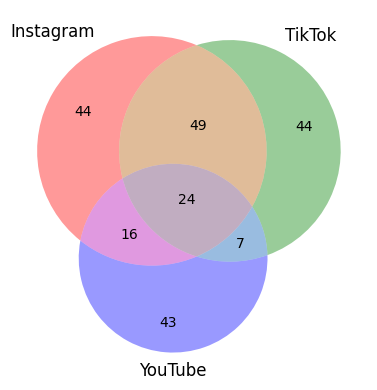

In [10]:
# Find common elements between lists
common_in_1_and_2 = insinf_en.intersection(ttinf_en)
common_in_1_and_3 = insinf_en.intersection(ytinf_en)
common_in_2_and_3 = ttinf_en.intersection(ytinf_en)

# Merge all common elements
all_common_elements = common_in_1_and_2.union(common_in_1_and_3, common_in_2_and_3)

# Create a dictionary to store the count of lists in which each name is present
name_presence_count = {}

# Check for each common element in the lists and update the count
for name in all_common_elements:
    count = 0
    if name in insinf_en:
        count += 1
    if name in ttinf_en:
        count += 1
    if name in ytinf_en:
        count += 1
    name_presence_count[name] = count
    
# Create a Dataframe for the names and counts
dfrep = pd.DataFrame(list(name_presence_count.items()), columns=['Name', 'Count'])

# Plot using a Venn Diagram
venn3([insinf_en, ttinf_en, ytinf_en], ('Instagram', 'TikTok', 'YouTube'))
plt.show()

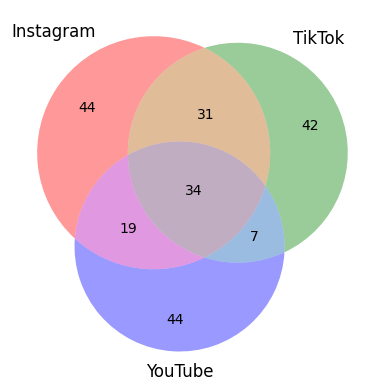

In [11]:
# Find common elements between lists
common_in_1_and_2 = insinf_nl.intersection(ttinf_nl)
common_in_1_and_3 = insinf_nl.intersection(ytinf_nl)
common_in_2_and_3 = ttinf_nl.intersection(ytinf_nl)

# Merge all common elements
all_common_elements = common_in_1_and_2.union(common_in_1_and_3, common_in_2_and_3)

# Create a dictionary to store the count of lists in which each name is present
name_presence_count = {}

# Check for each common element in the lists and update the count
for name in all_common_elements:
    count = 0
    if name in insinf_nl:
        count += 1
    if name in ttinf_nl:
        count += 1
    if name in ytinf_nl:
        count += 1
    name_presence_count[name] = count
    
# Create a Dataframe for the names and counts
dfrep = pd.DataFrame(list(name_presence_count.items()), columns=['Name', 'Count'])

# Plot using a Venn Diagram
venn3([insinf_nl, ttinf_nl, ytinf_nl], ('Instagram', 'TikTok', 'YouTube'))
plt.show()

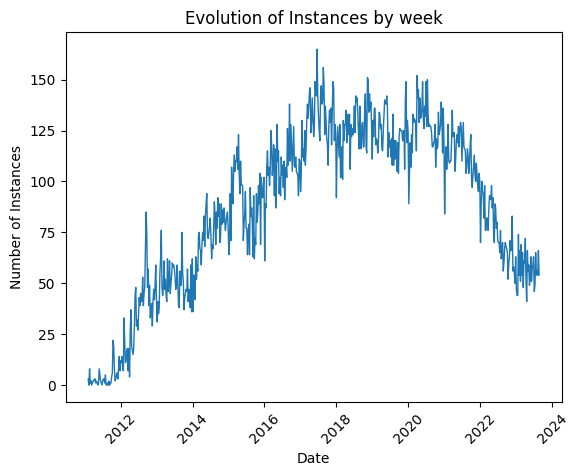

In [12]:
# Convert to datetime format
dfins_en['date'] = pd.to_datetime(dfins_en['date'])

# Group by the day and count instances for each week
count_by_week = dfins_en.resample('W-Mon', on='date').size().reset_index(name='count')

# Plot the data
plt.plot(count_by_week['date'], count_by_week['count'], marker='', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances by week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Show the plot
plt.show()

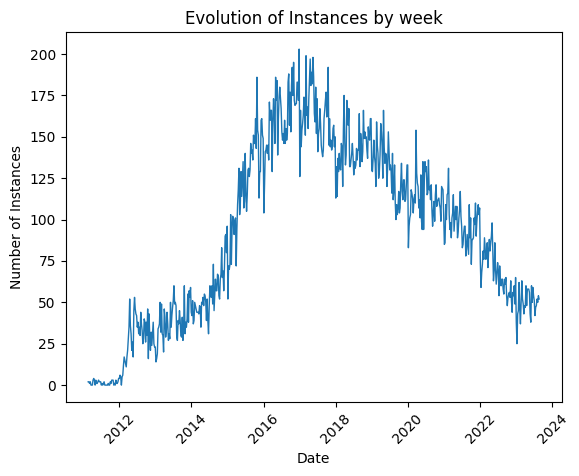

In [13]:
# Convert to datetime format
dfins_nl['date'] = pd.to_datetime(dfins_nl['date'])

# Group by the day and count instances for each week
count_by_week = dfins_nl.resample('W-Mon', on='date').size().reset_index(name='count')

# Plot the data
plt.plot(count_by_week['date'], count_by_week['count'], marker='', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances by week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Show the plot
plt.show()

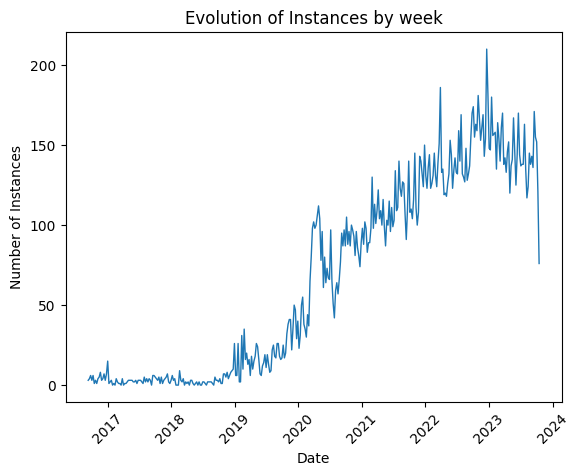

In [14]:
# Convert to datetime format
dftt_en['create_time'] = pd.to_datetime(dftt_en['create_time'])

# Group by the day and count tt_entances for each week
count_by_week = dftt_en.resample('W-Mon', on='create_time').size().reset_index(name='count')

# Plot the data
plt.plot(count_by_week['create_time'], count_by_week['count'], marker='', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances by week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Show the plot
plt.show()

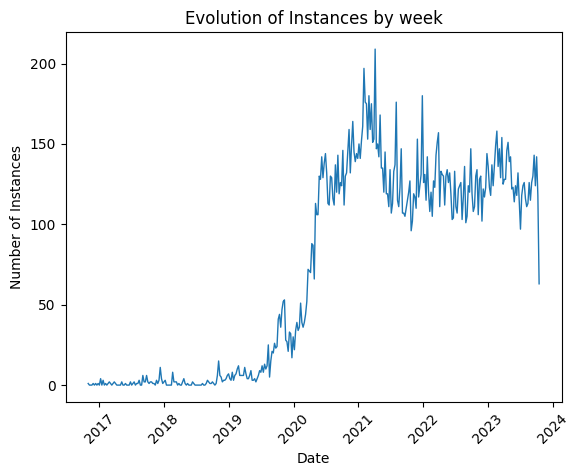

In [15]:
# Convert to datetime format
dftt_nl['create_time'] = pd.to_datetime(dftt_nl['create_time'])

# Group by the day and count tt_nltances for each week
count_by_week = dftt_nl.resample('W-Mon', on='create_time').size().reset_index(name='count')

# Plot the data
plt.plot(count_by_week['create_time'], count_by_week['count'], marker='', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances by week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Show the plot
plt.show()

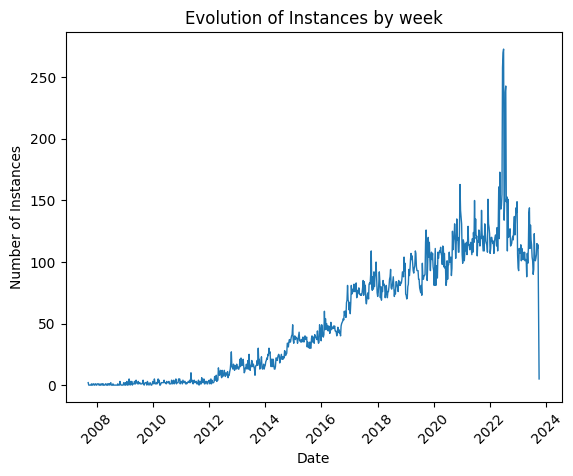

In [16]:
# Convert to datetime format
dfyt_en['published_at_video'] = pd.to_datetime(dfyt_en['published_at_video'])

# Group by the day and count yt_entances for each week
count_by_week = dfyt_en.resample('W-Mon', on='published_at_video').size().reset_index(name='count')

# Plot the data
plt.plot(count_by_week['published_at_video'], count_by_week['count'], marker='', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances by week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Show the plot
plt.show()

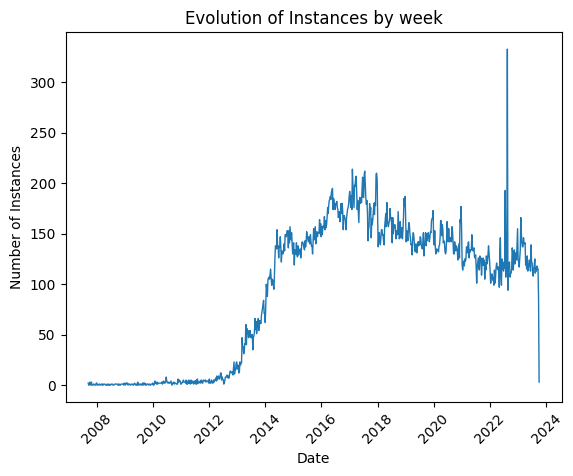

In [17]:
# Convert to datetime format
dfyt_nl['published_at_video'] = pd.to_datetime(dfyt_nl['published_at_video'])

# Group by the day and count yt_nltances for each week
count_by_week = dfyt_nl.resample('W-Mon', on='published_at_video').size().reset_index(name='count')

# Plot the data
plt.plot(count_by_week['published_at_video'], count_by_week['count'], marker='', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances by week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Show the plot
plt.show()

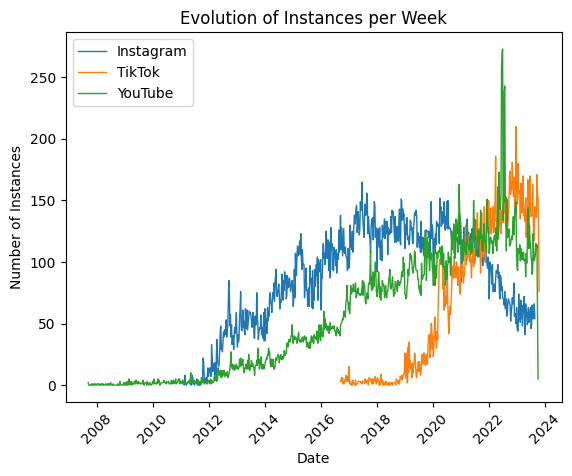

In [18]:
# Convert to datetime format for each DataFrame
dfins_en['date'] = pd.to_datetime(dfins_en['date'])
dftt_en['create_time'] = pd.to_datetime(dftt_en['create_time'])
dfyt_en['published_at_video'] = pd.to_datetime(dfyt_en['published_at_video'])

# Group by the week and count instances for each week for each DataFrame
count_by_week1 = dfins_en.resample('W-Mon', on='date').size().reset_index(name='count1')
count_by_week2 = dftt_en.resample('W-Mon', on='create_time').size().reset_index(name='count2')
count_by_week3 = dfyt_en.resample('W-Mon', on='published_at_video').size().reset_index(name='count3')

# Plot each DataFrame separately
plt.plot(count_by_week1['date'], count_by_week1['count1'], label='Instagram', linestyle='-', linewidth=1)
plt.plot(count_by_week2['create_time'], count_by_week2['count2'], label='TikTok', linestyle='-', linewidth=1)
plt.plot(count_by_week3['published_at_video'], count_by_week3['count3'], label='YouTube', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances per Week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()


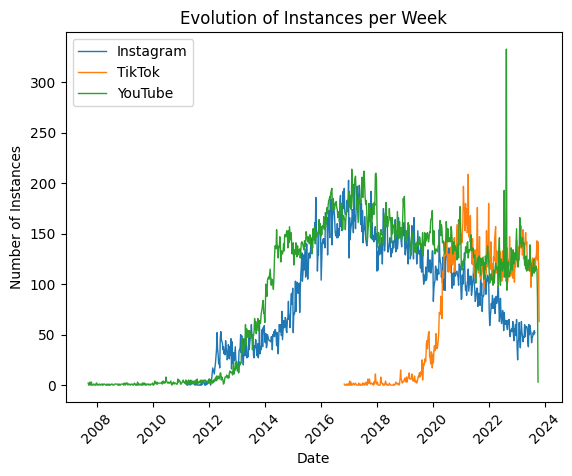

In [20]:
# Convert to datetime format for each DataFrame
dfins_nl['date'] = pd.to_datetime(dfins_nl['date'])
dftt_nl['create_time'] = pd.to_datetime(dftt_nl['create_time'])
dfyt_nl['published_at_video'] = pd.to_datetime(dfyt_nl['published_at_video'])

# Group by the week and count instances for each week for each DataFrame
count_by_week1 = dfins_nl.resample('W-Mon', on='date').size().reset_index(name='count1')
count_by_week2 = dftt_nl.resample('W-Mon', on='create_time').size().reset_index(name='count2')
count_by_week3 = dfyt_nl.resample('W-Mon', on='published_at_video').size().reset_index(name='count3')

# Plot each DataFrame separately
plt.plot(count_by_week1['date'], count_by_week1['count1'], label='Instagram', linestyle='-', linewidth=1)
plt.plot(count_by_week2['create_time'], count_by_week2['count2'], label='TikTok', linestyle='-', linewidth=1)
plt.plot(count_by_week3['published_at_video'], count_by_week3['count3'], label='YouTube', linestyle='-', linewidth=1)

# Customize the plot if needed
plt.title('Evolution of Instances per Week')
plt.xlabel('Date')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [21]:
# Calculate the time between posts for influencers
timediffins_en = pd.DataFrame({
    "Username": list(insinf_en),
    'Time Difference': [dfins_en[dfins_en['username'] == username]['date'].sort_values().diff().mean() for username in insinf_en]
})

timedifftt_en= pd.DataFrame({
    "Username": list(ttinf_en),
    'Time Difference': [dftt_en[dftt_en['username'] == username]['create_time'].sort_values().diff().mean() for username in ttinf_en]
})

timediffyt_en = pd.DataFrame({
    "Username": list(ytinf_en),
    'Time Difference': [dfyt_en[dfyt_en['channel_title'] == username]['published_at_video'].sort_values().diff().mean() for username in ytinf_en]
})

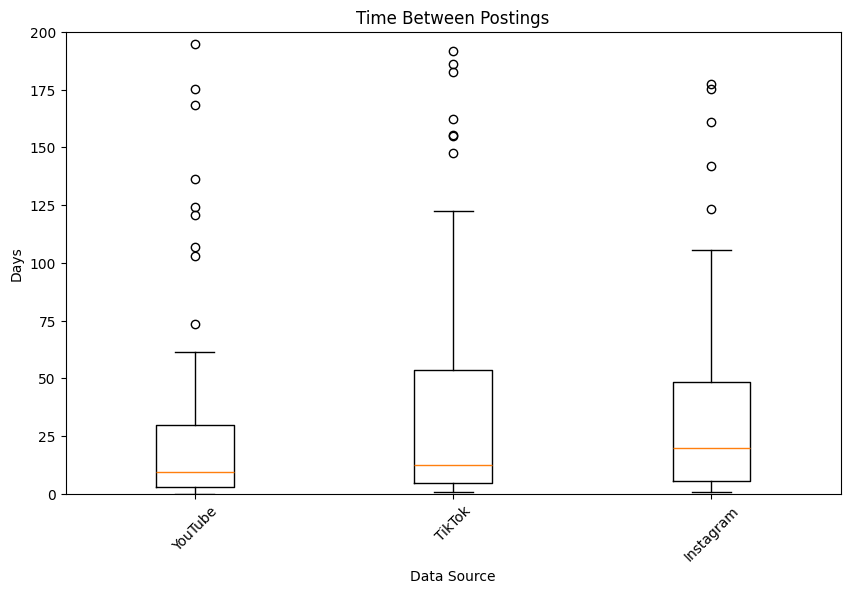

In [22]:

# Combine the data into a list of arrays
data_to_plot = [
    timediffyt_en["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
    timedifftt_en["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
    timediffins_en["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24)
]

# Create a boxplot for all the data
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['YouTube', 'TikTok', 'Instagram'])

# Customize the plot
plt.title('Time Between Postings')
plt.xlabel('Data Source')
plt.ylabel('Days')
plt.ylim(0, 200)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [23]:
# Calculate the time between posts for influencers
timediffins_nl = pd.DataFrame({
    "Username": list(insinf_nl),
    'Time Difference': [dfins_nl[dfins_nl['username'] == username]['date'].sort_values().diff().mean() for username in insinf_nl]
})

timedifftt_nl= pd.DataFrame({
    "Username": list(ttinf_nl),
    'Time Difference': [dftt_nl[dftt_nl['username'] == username]['create_time'].sort_values().diff().mean() for username in ttinf_nl]
})

timediffyt_nl = pd.DataFrame({
    "Username": list(ytinf_nl),
    'Time Difference': [dfyt_nl[dfyt_nl['channel_title'] == username]['published_at_video'].sort_values().diff().mean() for username in ytinf_nl]
})

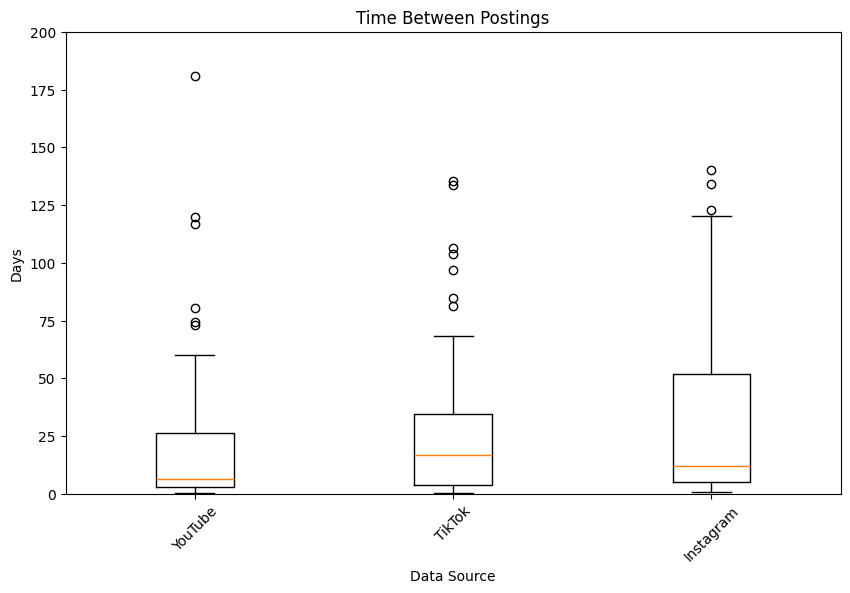

In [24]:

# Combine the data into a list of arrays
data_to_plot = [
    timediffyt_nl["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
    timedifftt_nl["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24),
    timediffins_nl["Time Difference"].dt.total_seconds().dropna() / (60 * 60 * 24)
]

# Create a boxplot for all the data
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['YouTube', 'TikTok', 'Instagram'])

# Customize the plot
plt.title('Time Between Postings')
plt.xlabel('Data Source')
plt.ylabel('Days')
plt.ylim(0, 200)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [25]:
dfins_en["caption_hashtags"] = dfins_en["caption_hashtags"].apply(lambda x: ast.literal_eval(x) if x else "")
dfinshas_en = dfins_en[dfins_en["caption_hashtags"].apply(lambda x: bool(x))].reset_index(drop=True)

In [26]:
G_en = nx.Graph()
for words_list in dfinshas_en['caption_hashtags']:
    G_en.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

In [62]:
# Specify the layout using the spring_layout
pos = nx.fruchterman_reingold_layout(G_en)


# Draw the graph with specified layout
nx.draw(G_en, pos, with_labels=False, node_size=50, edge_color='grey', width=0.5, alpha=0.3)

KeyboardInterrupt: 

In [ ]:
dfins_nl["caption_hashtags"] = dfins_nl["caption_hashtags"].apply(lambda x: ast.literal_eval(x) if x else "")
dfinshas_nl = dfins_nl[dfins_nl["caption_hashtags"].apply(lambda x: bool(x))].reset_index(drop=True)

In [ ]:
G_nl = nx.Graph()
for words_list in dfinshas_nl['caption_hashtags']:
    G_nl.add_edges_from([(word1, word2) for i, word1 in enumerate(words_list) for j, word2 in enumerate(words_list) if i < j])

In [ ]:
# Specify the layout using the spring_layout
pos = nx.fruchterman_reingold_layout(G_nl)


# Draw the graph with specified layout
nx.draw(G_nl, pos, with_labels=False, node_size=50, edge_color='grey', width=0.5, alpha=0.3)